In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
import pickle

# Fetching data
Dataset can be fetched directly from UC Irvine. Documentation found here: https://github.com/uci-ml-repo/ucimlrepo

In [3]:
# fetch dataset
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)

# data (as pandas dataframes)
data = diabetes_130_us_hospitals_for_years_1999_2008.data.original

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


## Looking at metadata

In [4]:
# metadata
diabetes_130_us_hospitals_for_years_1999_2008.metadata

{'uci_id': 296,
 'name': 'Diabetes 130-US Hospitals for Years 1999-2008',
 'repository_url': 'https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008',
 'data_url': 'https://archive.ics.uci.edu/static/public/296/data.csv',
 'abstract': 'The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.\nThe problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide

In [5]:
# variable information
diabetes_130_us_hospitals_for_years_1999_2008.variables

,name,role,type,demographic,description,units,missing_values
0,encounter_id,ID,,None,Unique identifier of an encounter,None,no
1,patient_nbr,ID,,None,Unique identifier of a patient,None,no
2,race,Feature,Categorical,Race,"Values: Caucasian, Asian, African American, Hi...",None,yes
3,gender,Feature,Categorical,Gender,"Values: male, female, and unknown/invalid",None,no
4,age,Feature,Categorical,Age,"Grouped in 10-year intervals: [0, 10), [10, 20...",None,no
5,weight,Feature,Categorical,None,Weight in pounds.,None,yes
6,admission_type_id,Feature,Categorical,None,Integer identifier corresponding to 9 distinct...,None,no
7,discharge_disposition_id,Feature,Categorical,None,Integer identifier corresponding to 29 distinc...,None,no
8,admission_source_id,Feature,Categorical,None,Integer identifier corresponding to 21 distinc...,None,no
9,time_in_hospital,Feature,Integer,None,Integer number of days between admission and d...,None,no


# Data Integrity

In [6]:
# get an overview over how data is represented inside pd.DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [7]:
# Check max_glue_serum and A1Cresult, because both are not supposed to contain NaN values but both do
for key in data[['max_glu_serum', 'A1Cresult']].keys():
  print("{column_name}: {unique_values}".format(column_name=key, unique_values = data[key].unique()))

max_glu_serum: [nan '>300' 'Norm' '>200']
A1Cresult: [nan '>7' '>8' 'Norm']


#### Results
According to the variable description there are seven variables with missing values. These are the following: *race*, *weight*, *payer_code*, *medical_specialty* and *diag_1*, *diag_2*, *diag_3*. Checking the dataset reveals, that *max_glu_serum* and *A1Cresult* also have missing values.
Upon further inspectione it seems, that the categorical value None got replaced with NaN by pandas.  
* For *weight* and *max_glu_serum* over 90% of values are missing or weren't measured.
* For *A1Cresult* rougly 85% of values were not measured.
* For *payer_code* and *medical_specialty* roughly 50% of values are missing.
* For *race*, *diag_1*, *diag_2*, *diag_3* less than 10% of values are missing.
  
This could lead to different imputing stratagies.

# Understanding Categorical Features
To better understand categorical features, this following section is trying to get an overview over values, distribution of these and which encoding methods are suitable.  


In [8]:
# Check how many unique values each categorical variable has
data_categorical = data.select_dtypes(include=["object"])

for key in data_categorical.keys():
  print("{column_name}: {unique_values} unique values".format(column_name=key, unique_values = len(data_categorical[key].unique())))

race: 6 unique values
gender: 3 unique values
age: 10 unique values
weight: 10 unique values
payer_code: 18 unique values
medical_specialty: 73 unique values
diag_1: 717 unique values
diag_2: 749 unique values
diag_3: 790 unique values
max_glu_serum: 4 unique values
A1Cresult: 4 unique values
metformin: 4 unique values
repaglinide: 4 unique values
nateglinide: 4 unique values
chlorpropamide: 4 unique values
glimepiride: 4 unique values
acetohexamide: 2 unique values
glipizide: 4 unique values
glyburide: 4 unique values
tolbutamide: 2 unique values
pioglitazone: 4 unique values
rosiglitazone: 4 unique values
acarbose: 4 unique values
miglitol: 4 unique values
troglitazone: 2 unique values
tolazamide: 3 unique values
examide: 1 unique values
citoglipton: 1 unique values
insulin: 4 unique values
glyburide-metformin: 4 unique values
glipizide-metformin: 2 unique values
glimepiride-pioglitazone: 2 unique values
metformin-rosiglitazone: 2 unique values
metformin-pioglitazone: 2 unique values

In [9]:
# Check the unique values of prescribed drugs
drug_data = data_categorical.loc[:, 'metformin':'metformin-pioglitazone']
for key in drug_data.keys():
  print("{column_name}: {unique_values}".format(column_name=key, unique_values = drug_data[key].unique()))

metformin: ['No' 'Steady' 'Up' 'Down']
repaglinide: ['No' 'Up' 'Steady' 'Down']
nateglinide: ['No' 'Steady' 'Down' 'Up']
chlorpropamide: ['No' 'Steady' 'Down' 'Up']
glimepiride: ['No' 'Steady' 'Down' 'Up']
acetohexamide: ['No' 'Steady']
glipizide: ['No' 'Steady' 'Up' 'Down']
glyburide: ['No' 'Steady' 'Up' 'Down']
tolbutamide: ['No' 'Steady']
pioglitazone: ['No' 'Steady' 'Up' 'Down']
rosiglitazone: ['No' 'Steady' 'Up' 'Down']
acarbose: ['No' 'Steady' 'Up' 'Down']
miglitol: ['No' 'Steady' 'Down' 'Up']
troglitazone: ['No' 'Steady']
tolazamide: ['No' 'Steady' 'Up']
examide: ['No']
citoglipton: ['No']
insulin: ['No' 'Up' 'Steady' 'Down']
glyburide-metformin: ['No' 'Steady' 'Down' 'Up']
glipizide-metformin: ['No' 'Steady']
glimepiride-pioglitazone: ['No' 'Steady']
metformin-rosiglitazone: ['No' 'Steady']
metformin-pioglitazone: ['No' 'Steady']


In [10]:
# Take at look at the three missing categorical variables because their datatype is int
categorical_numerical_data = data[['admission_type_id', 'discharge_disposition_id', 'admission_source_id']]
for key in categorical_numerical_data.keys():
  print("{column_name}: {unique_values} in total {n} unique values".format(column_name=key, unique_values = categorical_numerical_data[key].unique(), n = len(categorical_numerical_data[key].unique())))

admission_type_id: [6 1 2 3 4 5 8 7] in total 8 unique values
discharge_disposition_id: [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27] in total 26 unique values
admission_source_id: [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13] in total 17 unique values


#### Results:
comparing the information given through the variable description by UCI and the results above, we can deduce the following:  
The following variables are not categorical but binary:

*   change
*   diabetesMed  
  
The 23 different variables describing drug prescription should in theory all contain four unique values. On a first glance there are a few variables that seem to be binary, after further inspection, these are clearly not binary. Not all variables have as many unqiue values as stated in the variables description. This needs to be inspected further.
  
All remaining non binary categorials can be grouped into the following groups:

**Nominal:**

*   race
*   gender
*   payer_code
*   diag_1, diag_2, diag_3
*   medical_specialty
*   all three ids (admission_type_id, discharge_disposition_id, admissin_source_id)

**Ordinal:**

*   age
*   weight
*   max_glu_serum
*   A1Cresult
*   all drug prescreption variables
*   readmitted

There are three variables with an exceptional large range of unique values, these are:


*   diag_1
*   diag_2
*   diag_3

Further there are two more variables with a larger range of unique values, these are:


*   payer_code
*   medical_specialty
*   discharge_disposition_id
*   admission_source_id

All this has to be considered when choosing an encoding method. My first guess would be label encoding the variables with a large range of unique values and ordinal variables. The remaining nominal valriables could be encoded using one hot encoding.




# Encoding Values
Imputing variables with large chunks of data missing could be counter productive, since this results in basically synthetic data. Because of that, weight is omitted from the dataset. Further A1Cresult and max_glu_serum could be ommited from the dataset, because it was only measured for a small subset of patients. Further, the only possible values for the drug prescriptions of examide and citoglipton are "No" which seems useless. Next, encounter_id is just a unique identifier for each entry, which can also be dropped because it's of no use for classification.

In [11]:
# drop weight and examide, citoglipton.
data_encoded = data.copy().drop(['weight', 'examide','citoglipton', 'encounter_id'], axis=1)

# cast diabetesMed and change to bool
data_encoded['diabetesMed'] = (data_encoded['diabetesMed'] == 'Yes').astype(int)
data_encoded['change'] = (data_encoded['change'] == 'Ch').astype(int)

# Encode drug prescription data consistently across all variables
drug_data = data_encoded.loc[:, 'metformin':'metformin-pioglitazone']
for key in drug_data.keys():
  if len(drug_data[key].unique()) == 4:
    encodings = {key: {"No": 0, "Down": 1, 'Steady': 2, 'Up': 3}}
    drug_data = drug_data.replace(encodings)
  if len(drug_data[key].unique()) == 3:
    encodings = {key: {"No": 0, 'Steady': 2, 'Up': 3}}
    drug_data = drug_data.replace(encodings)
  if len(drug_data[key].unique()) == 2:
    encodings = {key: {"No": 0, 'Steady': 2}}
    drug_data = drug_data.replace(encodings)
  data_encoded[key] = drug_data[key]

# map average age of the corresponding age bracket as int instead of string
age_encodings = {'[0-10)': 5,
                  '[10-20)': 15,
                  '[20-30)': 25,
                  '[30-40)' : 35,
                  '[40-50)' : 45,
                  '[50-60)' : 55,
                  '[60-70)' : 65,
                  '[70-80)' : 75,
                  '[80-90)' : 85,
                  '[90-100)' : 95}
data_encoded['age'] = data_encoded['age'].map(age_encodings)
# For max_glu_serum and A1Cresult the categorical value None got replace with np.nan while fetching the data and reading it as a DataFrame
# these have to be replaced by categorical values again. In This case np.nan gets replaced with 'No', to be consitent with drug presciptiosn
data_encoded[['max_glu_serum', 'A1Cresult']] = data_encoded[['max_glu_serum', 'A1Cresult']].fillna(value='No')

# Encode 'max_glu_serum' and 'A1Cresult'
max_glu_serum_encodings = {'No' : 0, 'Norm' : 1, '>200': 2, '>300' : 3}
A1Cresult_encodings = {'No' : 0, 'Norm' :1, '>7' : 2, '>8' : 3}

data_encoded['max_glu_serum'] = data_encoded['max_glu_serum'].map(max_glu_serum_encodings)
data_encoded['A1Cresult'] = data_encoded['A1Cresult'].map(A1Cresult_encodings)


# use one-hot encoding to encode nominal values, which have low cardinality
data_encoded = pd.get_dummies(data_encoded, columns=['gender'], dtype=int)
data_encoded = pd.get_dummies(data_encoded, columns=['race'], dtype=int, dummy_na=True)

## Grouping and encoding ICD-9 codes
All values within the columns diag_1, diag_2 and diag_3 are strings. The ICD-9 codes are contained within these strings. Not all of these codes are numeric. However, the groups mentioned in the paper and adopted here all contain only numeric codes. Therefore, non-numeric codes can be sorted into "Other".

**Groups:**
*   Circulatory: 390-459, 785
*   Respiratory: 460-519
* Digestive: 520-579, 787
* Diabetes: 250.x.x
* Injury: 800-999
* Musculoskeletal: 710-739
* Genitourinary: 580–629, 788
* Neoplasms: 140–239
* Other: 780, 781, 784, 790–799, 240-249, 251-279, 680-709, 782, 001–139, 290–319, E-V, 280-289, 320-359, 630-679, 360-389, 740-759


In [12]:
diag_1_unique = data_encoded['diag_1'].unique()
non_numeric_values = [value for value in diag_1_unique if isinstance(value, str) and not value.isdigit()]
non_numeric_values

['250.83',
 '250.7',
 'V57',
 '250.6',
 '250.4',
 '250.11',
 '250.32',
 'V58',
 '250.13',
 '250.03',
 '250.8',
 '250.02',
 '250.42',
 '250.41',
 '250.22',
 '250.82',
 'V55',
 '250.33',
 '250.12',
 'V53',
 '250.81',
 '250.93',
 '250.01',
 '250.31',
 '250.43',
 '250.1',
 '250.2',
 '250.3',
 '250.23',
 '250.5',
 '250.92',
 '250.53',
 'V45',
 'V66',
 '250.21',
 'V56',
 'V26',
 '250.9',
 'V71',
 'V54',
 'V67',
 'V60',
 '250.52',
 '250.51',
 'V43',
 '250.91',
 'V63',
 'V25',
 'V70',
 'E909',
 'V07',
 'V51']

In [13]:
def group_diagnosis(code):
    if pd.isnull(code):
        return "Missing"
    if code.startswith('250'):
        return 'Diabetes'
    if not code.isdigit():  # Überprüfen, ob der Code keine Zahl ist
        return 'Other'
    code = float(code)
    if 390 <= code <= 459 or code == 785:
        return 'Circulatory'
    elif 460 <= code <= 519 or code == 786:
        return 'Respiratory'
    elif 520 <= code <= 579 or code == 787:
        return 'Digestive'
    elif 800 <= code <= 999:
        return 'Injury'
    elif 710 <= code <= 739:
        return 'Musculoskeletal'
    elif 580 <= code <= 629 or code == 788:
        return 'Genitourinary'
    elif 140 <= code <= 239:
        return 'Neoplasms'
    else:
        return 'Other'

data_encoded['diag_1_group'] = data_encoded['diag_1'].apply(group_diagnosis)
data_encoded['diag_2_group'] = data_encoded['diag_2'].apply(group_diagnosis)
data_encoded['diag_3_group'] = data_encoded['diag_3'].apply(group_diagnosis)

pd.set_option('display.max_columns', None)

In [14]:
# one hot encoding for diag_1_group
diag_1_group_encoded = pd.get_dummies(data_encoded['diag_1_group'], prefix='diag_1', dtype=int)
data_encoded = pd.concat([data_encoded, diag_1_group_encoded], axis=1)
data_encoded.drop('diag_1_group', axis=1, inplace=True)

# one hot encoding for diag_2_group
diag_2_group_encoded = pd.get_dummies(data_encoded['diag_2_group'], prefix='diag_2', dtype=int)
data_encoded = pd.concat([data_encoded, diag_2_group_encoded], axis=1)
data_encoded.drop('diag_2_group', axis=1, inplace=True)

# one hot encoding for diag_3_group
diag_3_group_encoded = pd.get_dummies(data_encoded['diag_3_group'], prefix='diag_3', dtype=int)
data_encoded = pd.concat([data_encoded, diag_3_group_encoded], axis=1)
data_encoded.drop('diag_3_group', axis=1, inplace=True)

In [15]:
# delete old columns
data_encoded.drop('diag_1', axis=1, inplace=True)
data_encoded.drop('diag_2', axis=1, inplace=True)
data_encoded.drop('diag_3', axis=1, inplace=True)

# Grouping Medical Specialties



In [16]:
specialty_unique = data_encoded['medical_specialty'].unique()
specialty_unique

array(['Pediatrics-Endocrinology', nan, 'InternalMedicine',
       'Family/GeneralPractice', 'Cardiology', 'Surgery-General',
       'Orthopedics', 'Gastroenterology',
       'Surgery-Cardiovascular/Thoracic', 'Nephrology',
       'Orthopedics-Reconstructive', 'Psychiatry', 'Emergency/Trauma',
       'Pulmonology', 'Surgery-Neuro',
       'Obsterics&Gynecology-GynecologicOnco', 'ObstetricsandGynecology',
       'Pediatrics', 'Hematology/Oncology', 'Otolaryngology',
       'Surgery-Colon&Rectal', 'Pediatrics-CriticalCare', 'Endocrinology',
       'Urology', 'Psychiatry-Child/Adolescent', 'Pediatrics-Pulmonology',
       'Neurology', 'Anesthesiology-Pediatric', 'Radiology',
       'Pediatrics-Hematology-Oncology', 'Psychology', 'Podiatry',
       'Gynecology', 'Oncology', 'Pediatrics-Neurology',
       'Surgery-Plastic', 'Surgery-Thoracic',
       'Surgery-PlasticwithinHeadandNeck', 'Ophthalmology',
       'Surgery-Pediatric', 'Pediatrics-EmergencyMedicine',
       'PhysicalMedicineandRe

General Practice:
* 'Family/GeneralPractice'

Internal Medicine:
* 'InternalMedicine'
* 'Endocrinology'
* 'Nephrology'
* 'Pulmonology'
* 'Hematology/Oncology'
* 'InfectiousDiseases'
* 'Rheumatology'
* 'AllergyandImmunology'
* 'Endocrinology-Metabolism'

Surgery:
* 'Surgery-General'
* 'Orthopedics'
* 'Orthopedics-Reconstructive'
* 'Surgery-Cardiovascular/Thoracic'
* 'Surgery-Neuro'
* 'Surgery-Colon&Rectal'
* 'Surgery-Plastic'
* 'Surgery-Thoracic'
* 'Surgery-PlasticwithinHeadandNeck'
* 'Surgery-Pediatric'
* 'Surgery-Vascular'
* 'Proctology'
* 'SurgicalSpecialty'
* 'Surgery-Cardiovascular'
* 'SurgicalSpecialty'
* 'Surgery-Maxillofacial'

Missing:
* 'nan'
* 'PhysicianNotFound'

Others: every specialty not mentioned above

In [17]:
def categorize_medical_specialty(specialty):
    if specialty in ['Family/GeneralPractice']:
        return 'General Practice'
    elif specialty in ['InternalMedicine', 'Endocrinology', 'Nephrology', 'Pulmonology',
                       'Hematology/Oncology', 'InfectiousDiseases', 'Rheumatology',
                       'AllergyandImmunology', 'Endocrinology-Metabolism']:
        return 'Internal Medicine'
    elif specialty in ['Surgery-General', 'Orthopedics', 'Orthopedics-Reconstructive',
                       'Surgery-Cardiovascular/Thoracic', 'Surgery-Neuro',
                       'Surgery-Colon&Rectal', 'Surgery-Plastic', 'Surgery-Thoracic',
                       'Surgery-PlasticwithinHeadandNeck', 'Surgery-Pediatric',
                       'Surgery-Vascular', 'Proctology', 'SurgicalSpecialty',
                       'Surgery-Cardiovascular', 'SurgicalSpecialty', 'Surgery-Maxillofacial']:
        return 'Surgery'
    elif pd.isnull(specialty) or specialty == 'PhysicianNotFound':
        return 'Missing'
    else:
        return 'Others'

data_encoded['medical_specialty_group'] = data_encoded['medical_specialty'].apply(categorize_medical_specialty)
data_encoded.drop('medical_specialty', axis=1, inplace=True)

In [18]:
# one hot encoding medical_specialty_group
medical_specialty_group_encoded = pd.get_dummies(data_encoded['medical_specialty_group'], prefix='medical_specialty', dtype=int)
data_encoded = pd.concat([data_encoded, medical_specialty_group_encoded], axis=1)
data_encoded.drop('medical_specialty_group', axis=1, inplace=True)

# ID Mappings

**Admission types ID:**

1 = Emergency  
2 = Urgent  
3 = Elective  
4 = Newborn  
5 = Not Available  
6 = NULL  
7 = Trauma Center  
8 = Not Mapped

**Grouped to:**

Emergency = 1,2,7  
Elective = 3  
Newborn = 4  
Unavailable = 5,6,8


In [19]:
admission_type_id = data['admission_type_id'].value_counts()
discharge_disposition_counts = data['discharge_disposition_id'].value_counts()
admission_source_counts = data['admission_source_id'].value_counts()

#Verteilung ausgeben, um zu gucken, ob es Sinn mach, kleine Gruppen zu entfernen
print("Admission Type ID Verteilung:\n", admission_type_id)
print("\nDischarge Disposition ID Verteilung:\n", discharge_disposition_counts)
print("\nAdmission Source ID Verteilung:\n", admission_source_counts)

Admission Type ID Verteilung:
 admission_type_id
1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: count, dtype: int64

Discharge Disposition ID Verteilung:
 discharge_disposition_id
1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: count, dtype: int64

Admission Source ID Verteilung:
 admission_source_id
7     57494
1     29565
17     6781
4      3187
6      2264
2      1104
5       855
3       187
20      161
9       125
8        16
22       12
10        8
14        2
11        2
25        2
13        1
Name: count, dtype: int64


In [20]:
#Grouping der Types
def map_admission_type(admission_type_id):
    if admission_type_id in [1, 2, 7]:
        return 'Emergency'
    elif admission_type_id == 3:
        return 'Elective'
    elif admission_type_id == 4:
        return 'Newborn'
    elif admission_type_id in [5, 6, 8]:
        return 'Unavailable'

data_encoded['admission_group'] = data_encoded['admission_type_id'].apply(map_admission_type)
#one-hot encoding der zusammengefassten admission types
admission_group_dummies = pd.get_dummies(data_encoded['admission_group'], prefix='admission_group', dtype=int)
data_encoded = pd.concat([data_encoded, admission_group_dummies], axis=1)
data_encoded.drop('admission_type_id', axis=1, inplace=True)
data_encoded.drop('admission_group', axis=1, inplace=True)

**Grouped Discharge disposition ID:**

1 = HomeWFollowUp :
  - Discharged to home with home health service (6)
  - Discharged/transferred to home under care of Home IV provider (8)

2 = InstitutionalCare:
  - Discharged/transferred to another short term hospital (2)
  - Discharged/transferred to SNF (Skilled Nursing Facility) (3)
  - Discharged/transferred to ICF (Intermediate Care Facility) (4)
  - Discharged/transferred to another rehab facility including rehab units of a hospital (22)
  - Discharged/transferred to a long term care hospital (23)
  - Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare (24)
  - Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere (30)
  - Discharged/transferred to a federal health care facility (27)
  - Discharged/transferred to a psychiatric hospital or psychiatric distinct part unit of a hospital (28)
  - Discharged/transferred to a Critical Access Hospital (CAH) (29)

3 = HomeDischarge:
  - Discharged to home (1)

4 = EndOfLife:
  - Expired (11)
  - Hospice / home (13)
  - Hospice / medical facility (14)
  - Expired at home. Medicaid only, hospice (19)
  - Expired in a medical facility. Medicaid only, hospice (20)
  - Expired, place unknown. Medicaid only, hospice (21)

5 = AMA_StillCare:
  - Left AMA (7)
  - Still patient or expected to return for outpatient services (12)

6 = Unknown:
  - Not Available (5)
  - NULL (18)
  - Not Mapped (25)
  - Unknown/Invalid (26)




In [21]:
def map_discharge_disposition_id(disposition_id):
    if disposition_id in [6, 8]:
        return 'HomeWFollowUp'
    elif disposition_id in [2, 3, 4, 22, 23, 24, 30, 27, 28, 29]:
        return 'InstitutionalCare'
    elif disposition_id in [1]:
        return 'HomeDischarge'
    elif disposition_id in [11, 13, 14, 19, 20, 21]:
        return 'EndOfLife'
    elif disposition_id in [7, 12]:
        return 'AMA_StillCare'
    elif disposition_id in [5, 18, 25, 26]:
        return 'Unknown'

data_encoded['discharge_disposition_id_grouped'] = data_encoded['discharge_disposition_id'].apply(map_discharge_disposition_id)
admission_group_dummies = pd.get_dummies(data_encoded['discharge_disposition_id_grouped'], prefix='discharge_disposition_id_grouped', dtype=int)
data_encoded = pd.concat([data_encoded, admission_group_dummies], axis=1)
data_encoded.drop('discharge_disposition_id', axis=1, inplace=True)
data_encoded.drop('discharge_disposition_id_grouped', axis=1, inplace=True)

**Grouped Admission Souce ID**

1 = Referrals:
  - Physician Referral (1)
  - Clinic Referral (2)
  - HMO Referral (3)

2 = Transfers:
  - Transfer from a hospital (4)
  - Transfer from a Skilled Nursing Facility (SNF) (5)
  - Transfer from another health care facility (6)
  - Transfer from critical access hospital (10)
  - Transfer From Another Home Health Agency (18)
  - Transfer from hospital inpt/same fac reslt in a sep claim (22)
  - Transfer from Ambulatory Surgery Center (25)
  - Transfer from Hospice (26)

3 = EmergencyOrLaw:
  - Emergency Room (7)
  - Court/Law Enforcement (8)

4 = Births:
  - Normal Delivery (11)
  - Premature Delivery (12)
  - Sick Baby (13)
  - Extramural Birth (14)
  - Born inside this hospital (23)
  - Born outside this hospital (24)

5 = Unknown:
  - Not Available (9, 15)
  - NULL (17)
  - Not Mapped (20)
  - Unknown/Invalid (21)

6 = Readmission:
  - Readmission to Same Home Health Agency (19)

In [22]:
def map_admission_source(source_id):
    if source_id in [1, 2, 3]:
        return 'Referrals'
    elif source_id in [4, 5, 6, 10, 18, 22, 25, 26]:
        return 'Transfers'
    elif source_id in [7, 8]:
        return 'Emergency_or_Law'
    elif source_id in [11, 12, 13, 14, 23, 24]:
        return 'Births'
    elif source_id in [9, 15, 17, 20, 21]:
        return 'Data_Issues'
    elif source_id == 19:
        return 'Readmission'

data_encoded['admission_source_grouped'] = data_encoded['admission_source_id'].apply(map_admission_source)
admission_group_dummies = pd.get_dummies(data_encoded['admission_source_grouped'], prefix='admission_source_grouped', dtype=int)
data_encoded = pd.concat([data_encoded, admission_group_dummies], axis=1)
data_encoded.drop('admission_source_id', axis=1, inplace=True)
data_encoded.drop('admission_source_grouped', axis=1, inplace=True)

# Encoding target value

In [23]:
data_encoded['readmitted'].unique()
readmitted_encodings = {'NO' : 0,
                 '>30' : 0,
                 '<30' : 1
                 }
data_encoded['readmitted'] = data_encoded['readmitted'].map(readmitted_encodings)

In [24]:
data_encoded['readmitted'].unique()
data_encoded['readmitted'].value_counts()

readmitted
0    90409
1    11357
Name: count, dtype: int64

# Encoding payer_code

In [25]:
label_encoder = LabelEncoder()
data_encoded = data_encoded.copy()
data_encoded["payer_code_labeled"] = label_encoder.fit_transform(data_encoded["payer_code"].astype(str))

data_encoded.drop("payer_code", axis=1, inplace=True)
data_encoded.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 96 columns):
 #   Column                                              Non-Null Count   Dtype
---  ------                                              --------------   -----
 0   patient_nbr                                         101766 non-null  int64
 1   age                                                 101766 non-null  int64
 2   time_in_hospital                                    101766 non-null  int64
 3   num_lab_procedures                                  101766 non-null  int64
 4   num_procedures                                      101766 non-null  int64
 5   num_medications                                     101766 non-null  int64
 6   number_outpatient                                   101766 non-null  int64
 7   number_emergency                                    101766 non-null  int64
 8   number_inpatient                                    101766 non-null  int64
 9   numb

# Feature Distribution

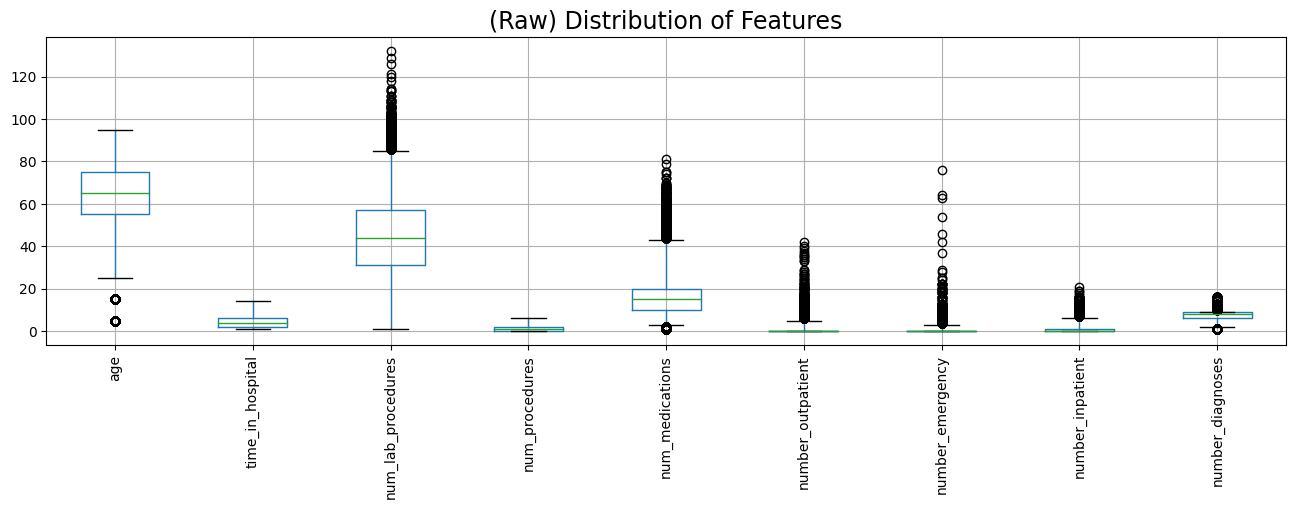

In [26]:
plt.figure(figsize=(16,4))
data_encoded.copy().drop('patient_nbr', axis=1).loc[:,'age':'number_diagnoses'].boxplot(whis=(1,99))
plt.title('(Raw) Distribution of Features', fontsize=17)
plt.xticks(rotation=90)
plt.show()

## Outlier

In [27]:
for key in data_encoded.loc[:,'time_in_hospital':'number_diagnoses'].keys():
    data_encoded[key] = data_encoded[key][(np.abs(stats.zscore(data_encoded[key])) < 3)]
data_encoded.head()

,patient_nbr,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,gender_Female,gender_Male,gender_Unknown/Invalid,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_nan,diag_1_Circulatory,diag_1_Diabetes,diag_1_Digestive,diag_1_Genitourinary,diag_1_Injury,diag_1_Missing,diag_1_Musculoskeletal,diag_1_Neoplasms,diag_1_Other,diag_1_Respiratory,diag_2_Circulatory,diag_2_Diabetes,diag_2_Digestive,diag_2_Genitourinary,diag_2_Injury,diag_2_Missing,diag_2_Musculoskeletal,diag_2_Neoplasms,diag_2_Other,diag_2_Respiratory,diag_3_Circulatory,diag_3_Diabetes,diag_3_Digestive,diag_3_Genitourinary,diag_3_Injury,diag_3_Missing,diag_3_Musculoskeletal,diag_3_Neoplasms,diag_3_Other,diag_3_Respiratory,medical_specialty_General Practice,medical_specialty_Internal Medicine,medical_specialty_Missing,medical_specialty_Others,medical_specialty_Surgery,admission_group_Elective,admission_group_Emergency,admission_group_Newborn,admission_group_Unavailable,discharge_disposition_id_grouped_AMA_StillCare,discharge_disposition_id_grouped_EndOfLife,discharge_disposition_id_grouped_HomeDischarge,discharge_disposition_id_grouped_HomeWFollowUp,discharge_disposition_id_grouped_InstitutionalCare,discharge_disposition_id_grouped_Unknown,admission_source_grouped_Births,admission_source_grouped_Data_Issues,admission_source_grouped_Emergency_or_Law,admission_source_grouped_Referrals,admission_source_grouped_Transfers,payer_code_labeled
0,8222157,5,1.0,41.0,0,1.0,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,17
1,55629189,15,3.0,59.0,0,18.0,0.0,0.0,0.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,17
2,86047875,25,2.0,11.0,5,13.0,2.0,0.0,1.0,6.0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,17
3,82442376,35,2.0,44.0,1,16.0,0.0,0.0,0.0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,17
4,42519267,45,1.0,51.0,0,8.0,0.0,0.0,0.0,5.0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,17


## Scaling

In [28]:
scaler = MinMaxScaler()
data_scaled = data_encoded.copy()
data_scaled[data_scaled.loc[:,'age':'number_diagnoses'].columns] = scaler.fit_transform(data_scaled.loc[:,'age':'number_diagnoses'])
data_scaled.head()

,patient_nbr,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,gender_Female,gender_Male,gender_Unknown/Invalid,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_nan,diag_1_Circulatory,diag_1_Diabetes,diag_1_Digestive,diag_1_Genitourinary,diag_1_Injury,diag_1_Missing,diag_1_Musculoskeletal,diag_1_Neoplasms,diag_1_Other,diag_1_Respiratory,diag_2_Circulatory,diag_2_Diabetes,diag_2_Digestive,diag_2_Genitourinary,diag_2_Injury,diag_2_Missing,diag_2_Musculoskeletal,diag_2_Neoplasms,diag_2_Other,diag_2_Respiratory,diag_3_Circulatory,diag_3_Diabetes,diag_3_Digestive,diag_3_Genitourinary,diag_3_Injury,diag_3_Missing,diag_3_Musculoskeletal,diag_3_Neoplasms,diag_3_Other,diag_3_Respiratory,medical_specialty_General Practice,medical_specialty_Internal Medicine,medical_specialty_Missing,medical_specialty_Others,medical_specialty_Surgery,admission_group_Elective,admission_group_Emergency,admission_group_Newborn,admission_group_Unavailable,discharge_disposition_id_grouped_AMA_StillCare,discharge_disposition_id_grouped_EndOfLife,discharge_disposition_id_grouped_HomeDischarge,discharge_disposition_id_grouped_HomeWFollowUp,discharge_disposition_id_grouped_InstitutionalCare,discharge_disposition_id_grouped_Unknown,admission_source_grouped_Births,admission_source_grouped_Data_Issues,admission_source_grouped_Emergency_or_Law,admission_source_grouped_Referrals,admission_source_grouped_Transfers,payer_code_labeled
0,8222157,0.000000,0.000000,0.396040,0.000000,0.000000,0.0,0.0,0.00,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,17
1,55629189,0.111111,0.166667,0.574257,0.000000,0.435897,0.0,0.0,0.00,0.636364,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,17
2,86047875,0.222222,0.083333,0.099010,0.833333,0.307692,0.5,0.0,0.25,0.363636,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,17
3,82442376,0.333333,0.083333,0.425743,0.166667,0.384615,0.0,0.0,0.00,0.454545,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,17
4,42519267,0.444444,0.000000,0.495050,0.000000,0.179487,0.0,0.0,0.00,0.272727,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,17


In [29]:
data_scaled = data_scaled.dropna()

In [30]:
data_scaled.shape

(94573, 96)

In [32]:
pickle.dump( data_scaled, open( "encodings.p", "wb" ) )
